# 房价数据探索

## 导入必要的工具包

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

## 读取数据

In [2]:
# path to where the data lies
#dpath = './data/'
data = pd.read_csv("Ames_House_train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

## 数据基本信息

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
### 查看是否有空值
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

## 探索数据

查看数据各特征的分布，以及特征之间是否存在相关关系等冗余。

我们可以借用可视化工具来直观感觉数据的分布。

在Python中，有很多数据可视化途径。
Matplotlib非常强大，也很复杂，不易于学习。 
Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。

In [5]:
## 各属性的统计特性
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

此处得到各属性的样本数目、均值、标准差、最小值、1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、最大值
可初步了解各特征的分布

### 单变量分布分析

C:\Users\YuGo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


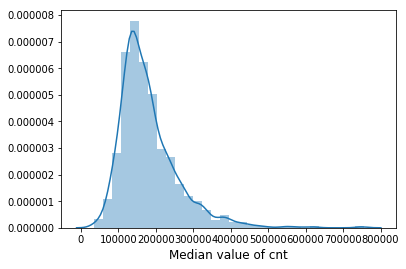

In [6]:
# 目标y（房屋价格）的直方图／分布
fig = plt.figure()
sns.distplot(data.SalePrice.values, bins=30, kde=True)
plt.xlabel('Median value of cnt', fontsize=12)
plt.show()

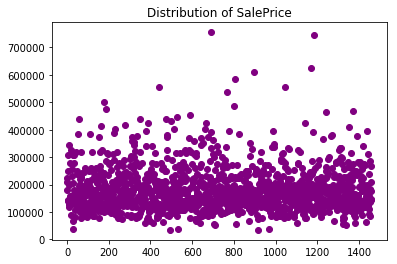

In [7]:
# 单个特征散点图
plt.scatter(range(data.shape[0]), data["SalePrice"].values,color='purple')
plt.title("Distribution of SalePrice");

## 输入属性的直方图／分布

C:\Users\YuGo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


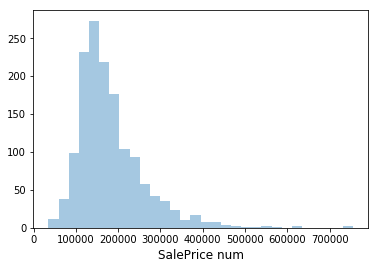

In [8]:
fig = plt.figure()
sns.distplot(data.SalePrice.values, bins=30, kde=False)
plt.xlabel('SalePrice num', fontsize=12)
plt.show()

两两特征之间的相关性

In [11]:
#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = data.corr().abs()

In [56]:
data_corr.shape

(38, 38)

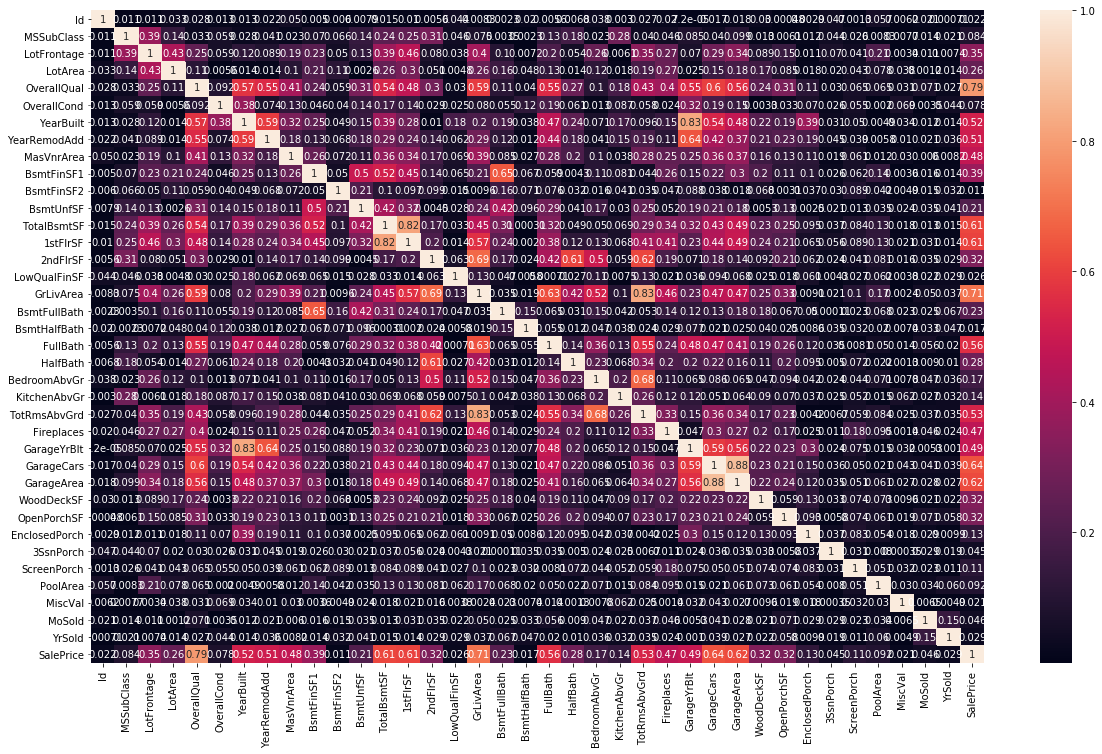

In [60]:
plt.subplots(figsize=(20, 12))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig('house_coor.png' )
plt.show()

In [13]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
#size = data.shape[1]
size = data_corr.shape[0]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

MasVnrArea and ExterQual = 0.88
Alley and MasVnrType = 0.83
HouseStyle and Exterior1st = 0.83
Neighborhood and Condition1 = 0.82
LotArea and BsmtUnfSF = 0.79
HouseStyle and BsmtUnfSF = 0.71
Condition2 and HouseStyle = 0.69
RoofStyle and Exterior1st = 0.68
Utilities and OverallQual = 0.65
LotShape and MasVnrType = 0.64
MasVnrArea and BsmtUnfSF = 0.64
HouseStyle and YearBuilt = 0.63
ExterQual and BsmtUnfSF = 0.62
Condition2 and Exterior1st = 0.62
Neighborhood and BsmtUnfSF = 0.61
Condition2 and YearRemodAdd = 0.61
Condition1 and BsmtUnfSF = 0.61
LotArea and MasVnrArea = 0.60
LotArea and HouseStyle = 0.59
Alley and LotShape = 0.59
MasVnrType and MasVnrArea = 0.59
LotArea and Alley = 0.57
Condition1 and HouseStyle = 0.57
MasVnrType and ExterQual = 0.56
LotArea and ExterQual = 0.56
YearBuilt and BsmtUnfSF = 0.56
YearBuilt and Exterior1st = 0.55
LotArea and LotShape = 0.55
LotArea and YearBuilt = 0.55
LotArea and MasVnrType = 0.55
Alley and MasVnrArea = 0.54
LotArea and Neighborhood = 0.54
E